In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

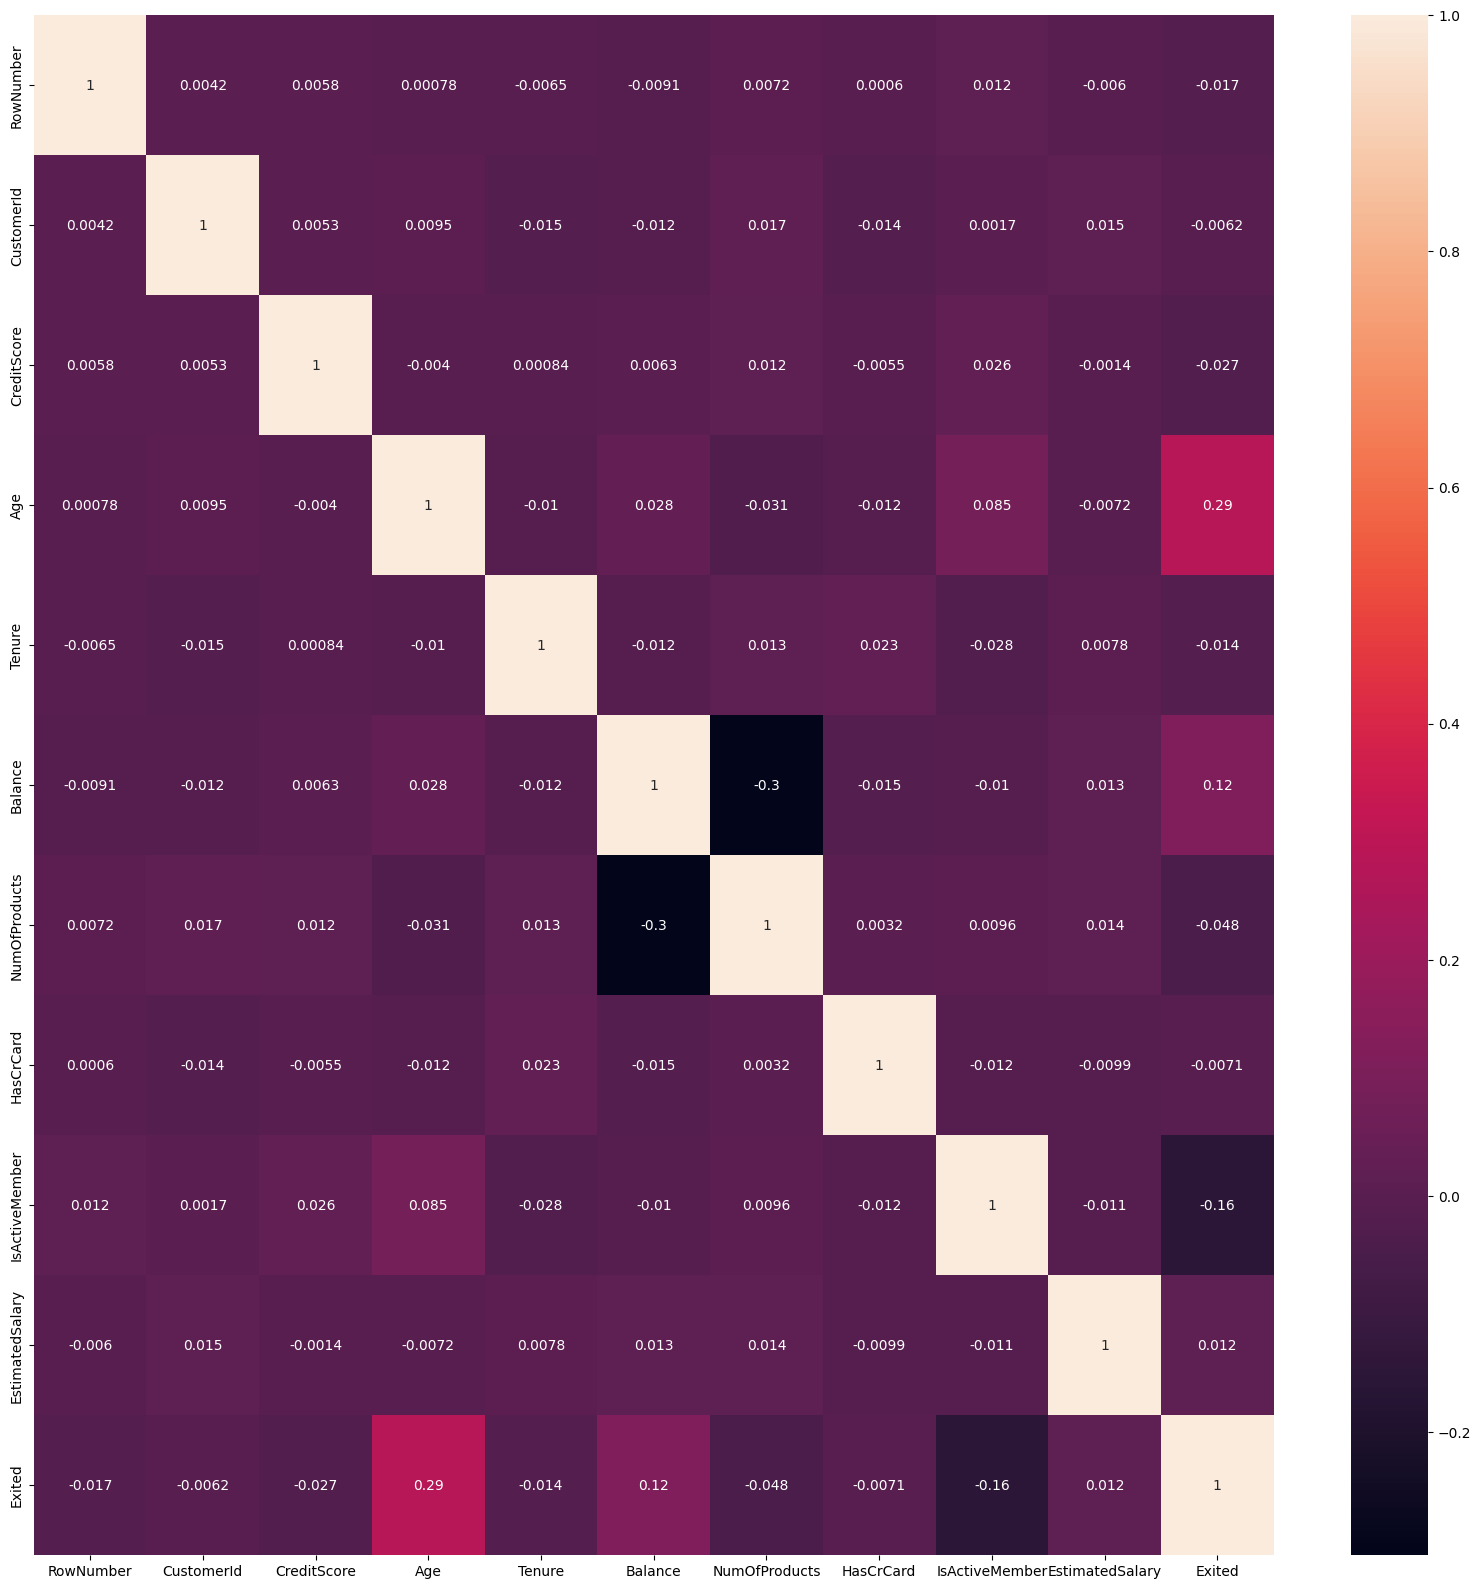

In [5]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(numeric_only= True) , annot = True)
plt.show()

In [39]:
df_copy = df.copy()

In [40]:
df_copy = df_copy.drop(columns = "CustomerId" )
df_copy = df_copy.drop(columns = "RowNumber" )
df_copy = df_copy.drop(columns = "Surname" )

In [41]:
df_copy

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [42]:
X = df_copy.drop(columns = "Exited")
Y = df_copy["Exited"]

In [43]:
from sklearn.preprocessing import *
sc = StandardScaler()
le = LabelEncoder()

In [51]:
X.CreditScore = sc.fit_transform(X.CreditScore.values.reshape(-1,1))
X.Balance = sc.fit_transform(X.Balance.values.reshape(-1,1))
X.EstimatedSalary = sc.fit_transform(X.EstimatedSalary.values.reshape(-1,1))
X.Age = sc.fit_transform(X.Age.values.reshape(-1,1))

In [52]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886
1,-0.440036,2,0,0.198164,1,0.117350,1,0,1,0.216534
2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687
3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918
4,2.063884,2,0,0.388871,2,0.785728,1,1,1,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,0.007457,5,-1.225848,2,1,0,-0.066419
9996,-1.391939,0,1,-0.373958,10,-0.306379,1,1,1,0.027988
9997,0.604988,0,0,-0.278604,7,-1.225848,1,0,1,-1.008643
9998,1.256835,1,1,0.293517,3,-0.022608,2,1,0,-0.125231


In [53]:
X.Gender = le.fit_transform(X.Gender)
X.Geography = le.fit_transform(X.Geography)

In [54]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886
1,-0.440036,2,0,0.198164,1,0.117350,1,0,1,0.216534
2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687
3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918
4,2.063884,2,0,0.388871,2,0.785728,1,1,1,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,0.007457,5,-1.225848,2,1,0,-0.066419
9996,-1.391939,0,1,-0.373958,10,-0.306379,1,1,1,0.027988
9997,0.604988,0,0,-0.278604,7,-1.225848,1,0,1,-1.008643
9998,1.256835,1,1,0.293517,3,-0.022608,2,1,0,-0.125231


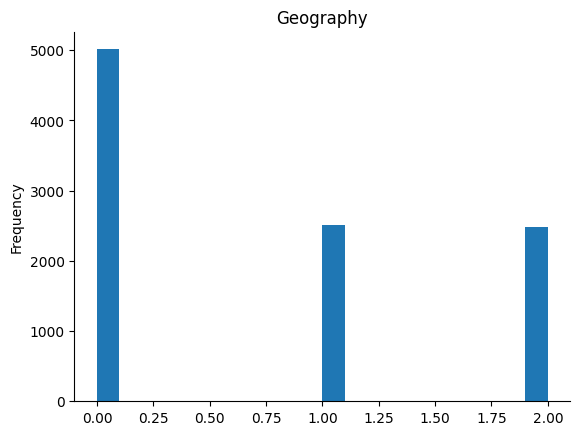

In [56]:
# @title Geography

from matplotlib import pyplot as plt
X['Geography'].plot(kind='hist', bins=20, title='Geography')
plt.gca().spines[['top', 'right',]].set_visible(False)

<BarContainer object of 1 artists>

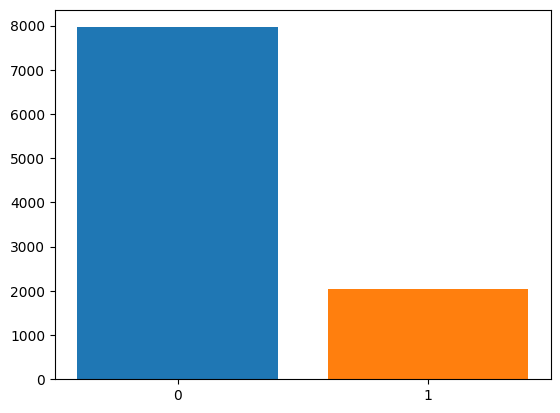

In [62]:
Title = Y.value_counts()
plt.bar("0" , Title[0]),
plt.bar("1" , Title[1])

In [63]:
import keras

In [65]:
from keras.models import Sequential
model1 = Sequential()

In [67]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 2)

In [68]:
model1.add(keras.layers.Dense(units = 32 , activation = 'relu'))

model1.add(keras.layers.Dense(units = 20 , activation = 'relu'))

model1.add(keras.layers.Dense(units = 8 , activation = 'softmax'))

In [70]:
model1.compile(loss = "sparse_categorical_crossentropy" , optimizer = "adam" ,  metrics=["accuracy"])


model1.fit(X_train , Y_train , batch_size=35, epochs = 80)

Epoch 1/80
229/229 [==============================] - 1s 2ms/step - loss: 0.8879 - accuracy: 0.6980
Epoch 2/80
229/229 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8014
Epoch 3/80
229/229 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.8091
Epoch 4/80
229/229 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8140
Epoch 5/80
229/229 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8234
Epoch 6/80
229/229 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8298
Epoch 7/80
229/229 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8309
Epoch 8/80
229/229 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8351
Epoch 9/80
229/229 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8336
Epoch 10/80
229/229 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8342

In [71]:
model1_p = model1.predict(X_test)

63/63 [==============================] - 0s 1ms/step


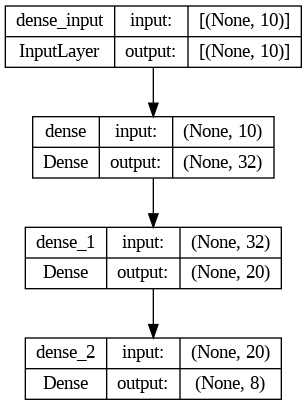

In [72]:
from keras.utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [73]:
########################################################################################

In [74]:
from xgboost import XGBClassifier
model2 = XGBClassifier(objective='binary:logistic')
model2.fit(X_train , Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
model2_p = model2.predict(X_test)

In [76]:
model2_p

array([0, 0, 1, ..., 1, 0, 0])

In [78]:
accuracy = model2.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.55%


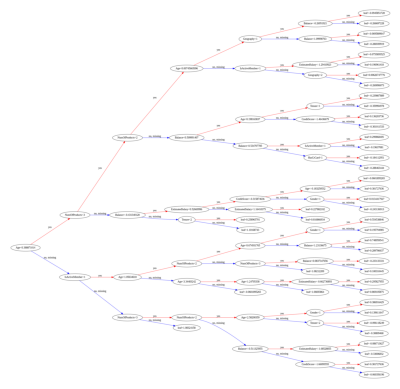

<Figure size 2000x2000 with 0 Axes>

In [80]:
from xgboost import plot_tree

X = X_train
y = model2.predict(X_test)
# plot single tree
plot_tree(model2,num_trees=0, rankdir='LR')
plt.figure(figsize = (20 ,20))
plt.show()

In [81]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
 dense_2 (Dense)             (None, 8)                 168       
                                                                 
Total params: 1180 (4.61 KB)
Trainable params: 1180 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
#*********************************************************************************#

In [84]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()

In [85]:
model3.fit(X_train , Y_train)

LogisticRegression()

In [86]:
model3_p = model3.predict(X_test)

In [88]:
model3_s = model3.score(X_train,Y_train)

In [89]:
model3_s

0.805875

In [90]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#

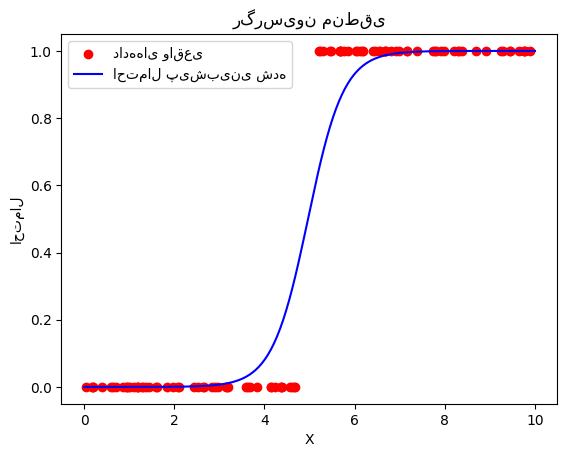

In [103]:
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # ویژگی‌ها
y = (X > 5).astype(int).ravel()  # برچسب‌ها: 0 یا 1

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# آموزش مدل رگرسیون منطقی
model3 = LogisticRegression()
model3.fit(X_train, y_train)

# پیش‌بینی مقادیر
X_range = np.linspace(0, 10, 300).reshape(-1, 1)
y_pred_prob = model3.predict_proba(X_range)[:, 1]

# رسم نمودار
plt.scatter(X, y, color='red', label='داده‌های واقعی')
plt.plot(X_range, y_pred_prob, color='blue', label='احتمال پیش‌بینی شده')
plt.xlabel('X')
plt.ylabel('احتمال')
plt.legend()
plt.title('رگرسیون منطقی')
plt.show()

In [ ]:
#best of models was : Neural Network by accuracy = %86.4 :)))))))))))